<a href="https://colab.research.google.com/github/Megha-karn/Capstone_Pizza_Sales_Analysis/blob/main/Pizza_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pizza Sales Analysis

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go

### Import raw data

In [33]:
df = pd.read_csv('/content/pizza_sales.csv')

### MetaData of Raw Data

In [34]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [35]:
df.tail()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


In [36]:
print("The MetaData of the dataset:", df.shape)

The MetaData of the dataset: (48620, 12)


In [37]:
print("The Raw of the dataset:", df.shape[0])

The Raw of the dataset: 48620


In [38]:
print("The Columns of the dataset:", df.shape[1])

The Columns of the dataset: 12


In [39]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [40]:
df.info

<bound method DataFrame.info of        pizza_id  order_id  pizza_name_id  quantity  order_date order_time  \
0             1         1     hawaiian_m         1  01-01-2015   11:38:36   
1             2         2  classic_dlx_m         1  01-01-2015   11:57:40   
2             3         2  five_cheese_l         1  01-01-2015   11:57:40   
3             4         2    ital_supr_l         1  01-01-2015   11:57:40   
4             5         2     mexicana_m         1  01-01-2015   11:57:40   
...         ...       ...            ...       ...         ...        ...   
48615     48616     21348  ckn_alfredo_m         1  31-12-2015   21:23:10   
48616     48617     21348  four_cheese_l         1  31-12-2015   21:23:10   
48617     48618     21348   napolitana_s         1  31-12-2015   21:23:10   
48618     48619     21349     mexicana_l         1  31-12-2015   22:09:54   
48619     48620     21350      bbq_ckn_s         1  31-12-2015   23:02:05   

       unit_price  total_price pizza_size pizza_category  \
0           13.25        13.25          M        Classic   
1           16.00        16.00          M        Classic   
2           18.50        18.50          L         Veggie   
3           20.75        20.75          L        Supreme   
4           16.00        16.00          M         Veggie   
...           ...          ...        ...            ...   
48615       16.75        16.75          M        Chicken   
48616       17.95        17.95          L         Veggie   
48617       12.00        12.00          S        Classic   
48618       20.25        20.25          L         Veggie   
48619       12.75        12.75          S        Chicken   

                                       pizza_ingredients  \
0               Sliced Ham, Pineapple, Mozzarella Cheese   
1      Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2      Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3      Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
4      Tomatoes, Red Peppers, Jalapeno Peppers, Red O...   
...                                                  ...   
48615  Chicken, Red Onions, Red Peppers, Mushrooms, A...   
48616  Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...   
48617  Tomatoes, Anchovies, Green Olives, Red Onions,...   
48618  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...   
48619  Barbecued Chicken, Red Peppers, Green Peppers,...   

                       pizza_name  
0              The Hawaiian Pizza  
1        The Classic Deluxe Pizza  
2           The Five Cheese Pizza  
3       The Italian Supreme Pizza  
4              The Mexicana Pizza  
...                           ...  
48615   The Chicken Alfredo Pizza  
48616       The Four Cheese Pizza  
48617        The Napolitana Pizza  
48618          The Mexicana Pizza  
48619  The Barbecue Chicken Pizza  

[48620 rows x 12 columns]>

## Data Types in Raw Data

In [41]:
df.dtypes

,0
pizza_id,int64
order_id,int64
pizza_name_id,object
quantity,int64
order_date,object
order_time,object
unit_price,float64
total_price,float64
pizza_size,object
pizza_category,object


In [42]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


## KPI's

In [43]:
total_revenue = df['total_price'].sum()
total_pizzas_sold = df['quantity'].sum()
total_orders = df['order_id'].nunique()
average_order_value = total_revenue / total_orders
average_pizzas_per_order = total_pizzas_sold / total_orders

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Pizzas Sold: {total_pizzas_sold}")
print(f"Total Orders: {total_orders}")
print(f"Average Order Value: ${average_order_value:,.2f}")
print(f"Average Pizzas per Order: {average_pizzas_per_order:.2f}")

Total Revenue: $817,860.05
Total Pizzas Sold: 49574
Total Orders: 21350
Average Order Value: $38.31
Average Pizzas per Order: 2.32


## Charts

### Ingredients Analysis

In [44]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [45]:
ingredient = (
                  df['pizza_ingredients']
                  .str.split(',')
                  .explode()
                  .str.strip()
                  .value_counts()
                  .reset_index()
                  .rename(columns = {'index':'counts','pizza_ingredients':'Indegredients'})
              )
print(ingredient.head(10))


       Indegredients  count
0             Garlic  27422
1           Tomatoes  26601
2         Red Onions  19547
3        Red Peppers  16284
4  Mozzarella Cheese  10333
5          Pepperoni  10300
6            Spinach  10012
7          Mushrooms   9624
8            Chicken   8443
9          Capocollo   6572


### Daily Trends- Total orders

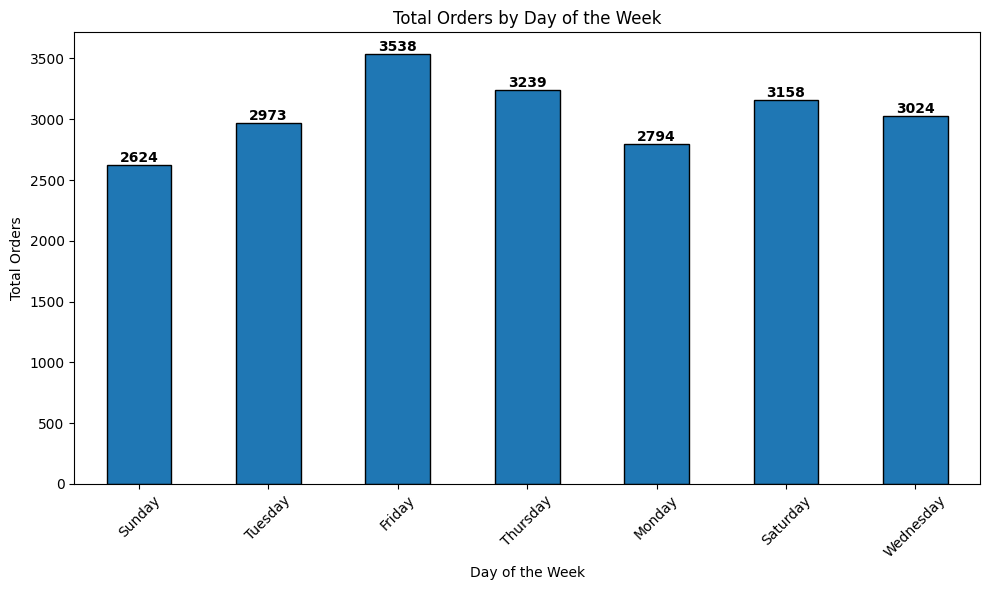

In [46]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst= True)

df['day_name'] = df['order_date'].dt.day_name()

weekday_order= {"Monday", "Tuesday","Wednesday", "Thursday","Friday","Saturday","Sunday"}

df['day_name'] = pd.Categorical(df['day_name'], categories=weekday_order, ordered = True)

orders_by_day = df.groupby('day_name', observed=False)['order_id'].nunique()

ax = orders_by_day.plot(kind='bar', figsize=(10, 6), edgecolor = 'black')

plt.title('Total Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)

for i,val in enumerate(orders_by_day):
  plt.text(i, val, str(val), ha='center', va='bottom', fontsize=10, fontweight = 'bold')
plt.tight_layout()
plt.show()


### Daily Trends - Total Quantity

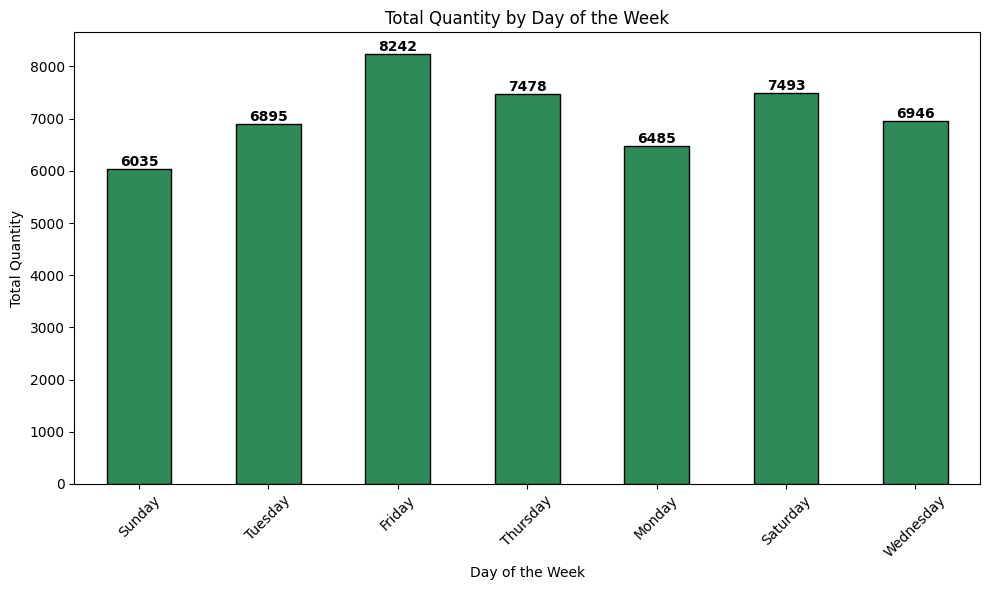

In [47]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst= True)

df['day_name'] = df['order_date'].dt.day_name()

weekday_order= {"Monday", "Tuesday","Wednesday", "Thursday","Friday","Saturday","Sunday"}

df['day_name'] = pd.Categorical(df['day_name'], categories = weekday_order, ordered = True)

orders_by_day = df.groupby('day_name', observed=False)['quantity'].sum()

ax = orders_by_day.plot(kind='bar', figsize=(10, 6),color='seagreen', edgecolor = 'black')

plt.title('Total Quantity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)

for i,val in enumerate(orders_by_day):
  plt.text(i, val, str(val), ha='center', va='bottom', fontsize=10, fontweight = 'bold')
plt.tight_layout()
plt.show()


### Daily Trends - total revenue

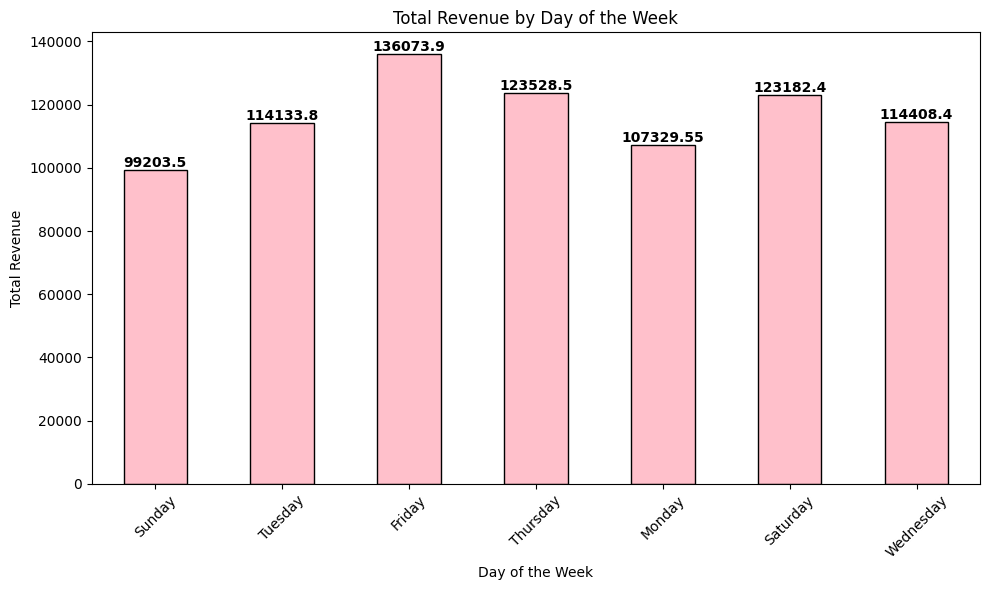

In [48]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst= True)

df['day_name'] = df['order_date'].dt.day_name()

weekday_order= {"Monday", "Tuesday","Wednesday", "Thursday","Friday","Saturday","Sunday"}

df['day_name'] = pd.Categorical(df['day_name'], categories = weekday_order, ordered = True)

orders_by_day = df.groupby('day_name', observed=False)['total_price'].sum()

ax = orders_by_day.plot(kind='bar', figsize=(10, 6),color='pink', edgecolor = 'black')

plt.title('Total Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

for i,val in enumerate(orders_by_day):
  plt.text(i, val, str(val), ha='center', va='bottom', fontsize=10, fontweight = 'bold')
plt.tight_layout()
plt.show()

### Hourly Trend - Total Orders

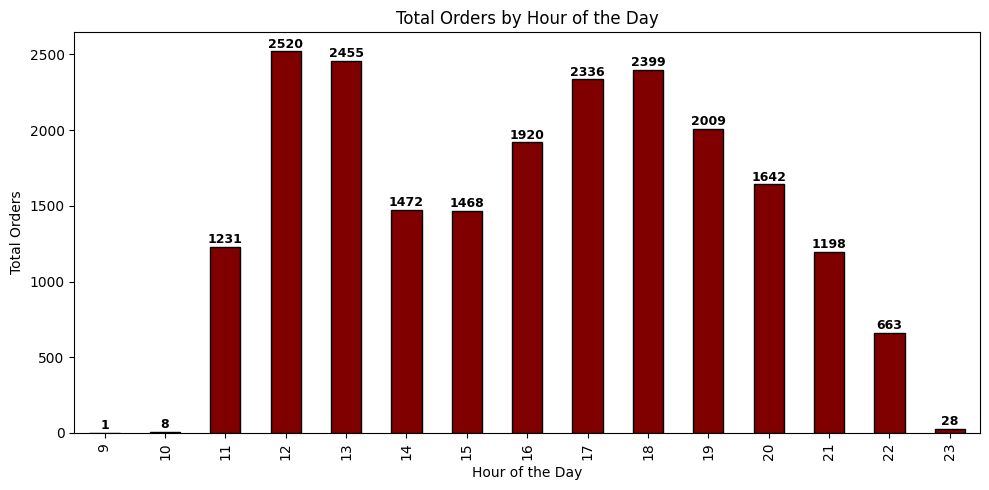

In [49]:
df['order_time'] =pd.to_datetime(df['order_time'], format = '%H:%M:%S')

df['order_hour'] = df['order_time'].dt.hour

orders_by_hour = df.groupby('order_hour', observed = False)['order_id'].nunique()

ax = orders_by_hour.plot(kind = 'bar', figsize=(10,5), color ='maroon', edgecolor ='black')

plt.title("Total Orders by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Orders")

for i,val in enumerate(orders_by_hour):
  plt.text(i, val+5, str(val), ha='center', va = 'bottom', fontsize = 9, fontweight='bold')

plt.tight_layout()
plt.show()

### Hourly Trend - Total Revenue

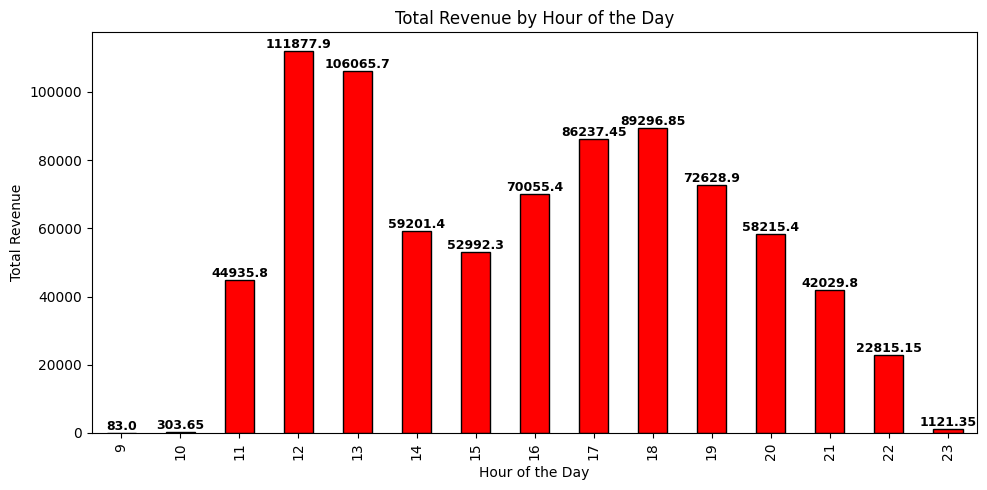

In [50]:
df['order_time'] =pd.to_datetime(df['order_time'], format = '%H:%M:%S')

df['order_hour'] = df['order_time'].dt.hour

orders_by_hour = df.groupby('order_hour', observed = False)['total_price'].sum()

ax = orders_by_hour.plot(kind = 'bar', figsize=(10,5), color ='red', edgecolor ='black')

plt.title("Total Revenue by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Revenue")

for i,val in enumerate(orders_by_hour):
  plt.text(i, val+5, str(val), ha='center', va = 'bottom', fontsize = 9, fontweight='bold')

plt.tight_layout()
plt.show()

### Hourly Trend - Total Quantity

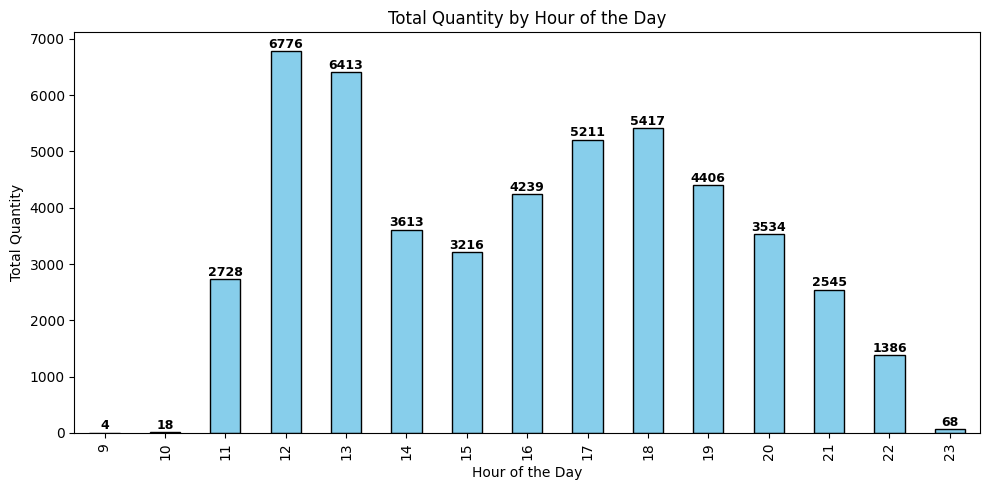

In [51]:
df['order_time'] =pd.to_datetime(df['order_time'], format = '%H:%M:%S')

df['order_hour'] = df['order_time'].dt.hour

orders_by_hour = df.groupby('order_hour', observed = False)['quantity'].sum()

ax = orders_by_hour.plot(kind = 'bar', figsize=(10,5), color ='skyblue', edgecolor ='black')

plt.title("Total Quantity by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Quantity")

for i,val in enumerate(orders_by_hour):
  plt.text(i, val+5, str(val), ha='center', va = 'bottom', fontsize = 9, fontweight='bold')

plt.tight_layout()
plt.show()

### Monthly Trend - Total Orders

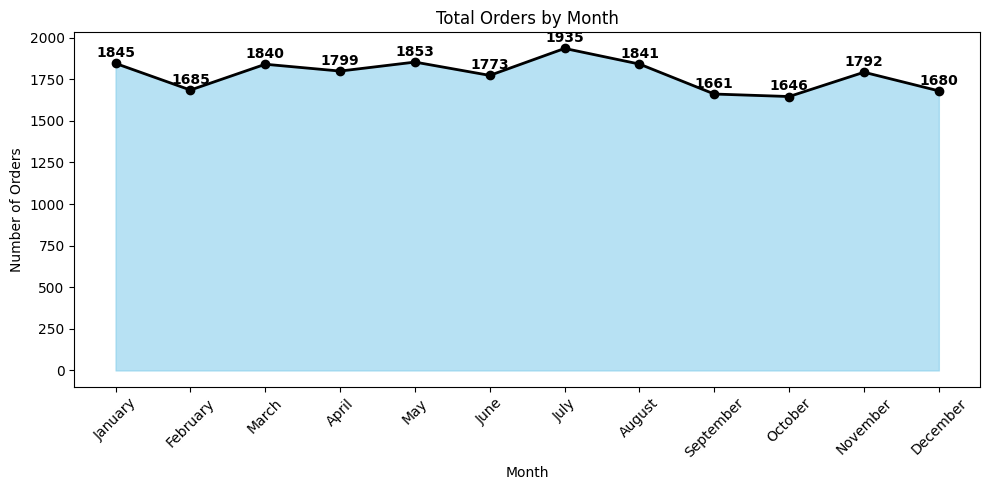

In [52]:
df['order_date']= pd.to_datetime(df['order_date'], dayfirst =True)

df['month_name'] = df['order_date'].dt.month_name()

month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

orders_by_month = df.groupby('month_name', observed=False)['order_id'].nunique()

plt.figure(figsize = (10,5))
plt.fill_between(orders_by_month.index, orders_by_month.values, color = 'skyblue', alpha=0.6)
plt.plot(orders_by_month.index, orders_by_month.values, color = "black", linewidth=2, marker = 'o')

plt.title("Total Orders by Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation = 45)

for i, val in enumerate(orders_by_month):
  plt.text(i, val+20, str(val), ha ="center", va='bottom', fontsize = 10, fontweight = 'bold')

plt.tight_layout()
plt.show()

### Monthly Trend - Total Revenue

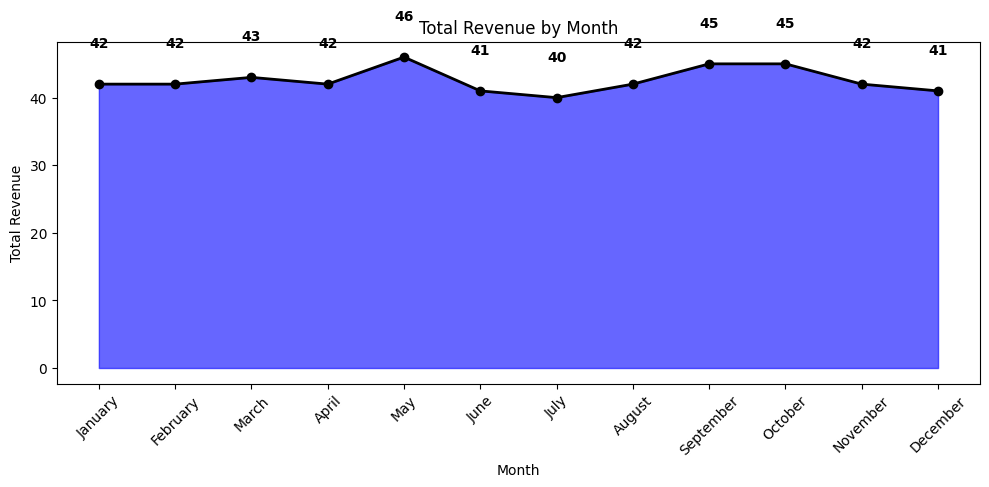

In [53]:
df['order_date']= pd.to_datetime(df['order_date'], dayfirst =True)

df['month_name'] = df['order_date'].dt.month_name()

month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

orders_by_month = df.groupby('month_name', observed=False)['total_price'].nunique()

plt.figure(figsize = (10,5))
plt.fill_between(orders_by_month.index, orders_by_month.values, color = 'blue', alpha=0.6)
plt.plot(orders_by_month.index, orders_by_month.values, color = "black", linewidth=2, marker = 'o')

plt.title("Total Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation = 45)

for i, val in enumerate(orders_by_month):
  plt.text(i, val+5, str(val), ha ="center", va='bottom', fontsize = 10, fontweight = 'bold')

plt.tight_layout()
plt.show()

### Monthly Trend - total quantity

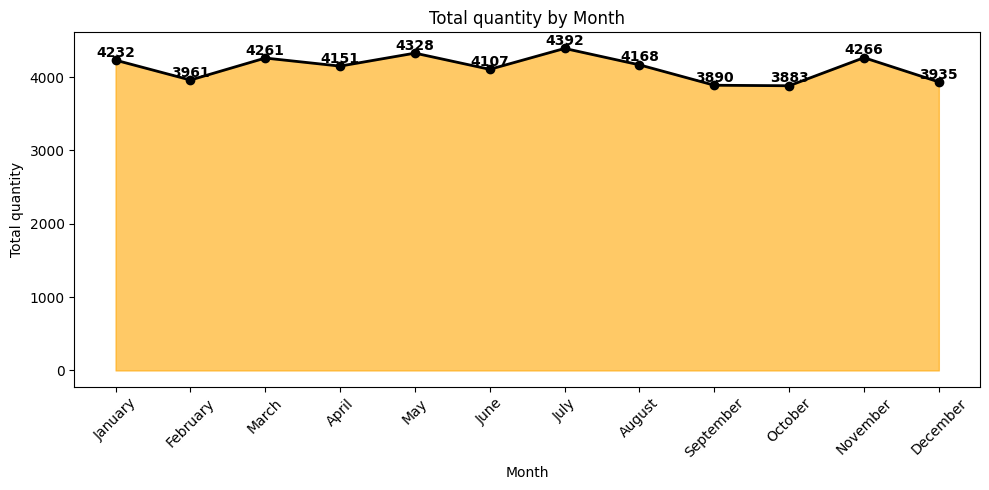

In [54]:
df['order_date']= pd.to_datetime(df['order_date'], dayfirst =True)

df['month_name'] = df['order_date'].dt.month_name()

month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

orders_by_month = df.groupby('month_name', observed=False)['quantity'].sum()

plt.figure(figsize = (10,5))
plt.fill_between(orders_by_month.index, orders_by_month.values, color = 'orange', alpha=0.6)
plt.plot(orders_by_month.index, orders_by_month.values, color = "black", linewidth=2, marker = 'o')

plt.title("Total quantity by Month")
plt.xlabel("Month")
plt.ylabel("Total quantity")
plt.xticks(rotation = 45)

for i, val in enumerate(orders_by_month):
  plt.text(i, val+5, str(val), ha ="center", va='bottom', fontsize = 10, fontweight = 'bold')

plt.tight_layout()
plt.show()

### of % Sales by pizza category

In [55]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_name,order_hour,month_name
0,1,1,hawaiian_m,1,2015-01-01,1900-01-01 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday,11,January
1,2,2,classic_dlx_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Thursday,11,January
2,3,2,five_cheese_l,1,2015-01-01,1900-01-01 11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,Thursday,11,January
3,4,2,ital_supr_l,1,2015-01-01,1900-01-01 11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,Thursday,11,January
4,5,2,mexicana_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,Thursday,11,January


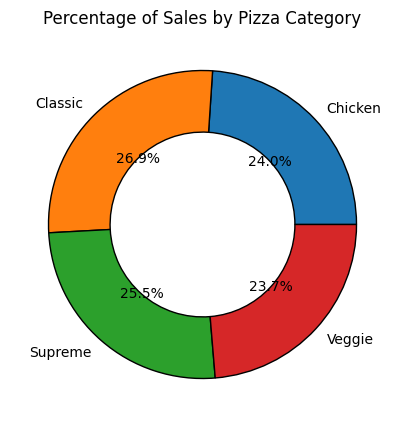

In [56]:
category_sales = df.groupby('pizza_category')['total_price'].sum()
category_PCT = category_sales/ category_sales.sum()*100

plt.figure(figsize=(10,5))
plt.pie(category_PCT, labels=category_PCT.index, autopct='%1.1f%%', wedgeprops={'edgecolor':'black', 'width':0.4})
plt.title('Percentage of Sales by Pizza Category')
plt.show()

### % Sales by Pizza Size & Category

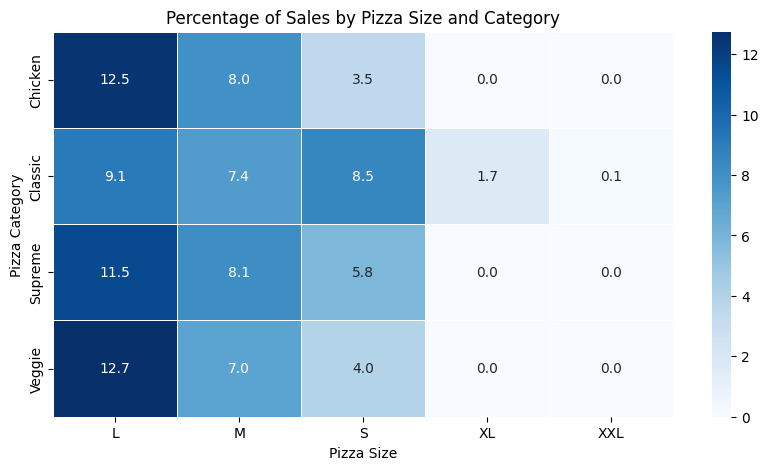

In [57]:
sales_pivot = df.pivot_table(
    index ='pizza_category',
    columns = 'pizza_size',
    values ='total_price',
    aggfunc = 'sum',
    fill_value = 0
)
sales_PCT = sales_pivot/sales_pivot.sum().sum()* 100

plt.figure(figsize = (10,5))
sns.heatmap(sales_PCT, annot = True, fmt='.1f', cmap='Blues', linewidth = 0.5)
plt.title('Percentage of Sales by Pizza Size and Category')
plt.xlabel('Pizza Size')
plt.ylabel('Pizza Category')
plt.show()

### total pizza sold by pizza category

In [58]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_name,order_hour,month_name
0,1,1,hawaiian_m,1,2015-01-01,1900-01-01 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday,11,January
1,2,2,classic_dlx_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Thursday,11,January
2,3,2,five_cheese_l,1,2015-01-01,1900-01-01 11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,Thursday,11,January
3,4,2,ital_supr_l,1,2015-01-01,1900-01-01 11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,Thursday,11,January
4,5,2,mexicana_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,Thursday,11,January


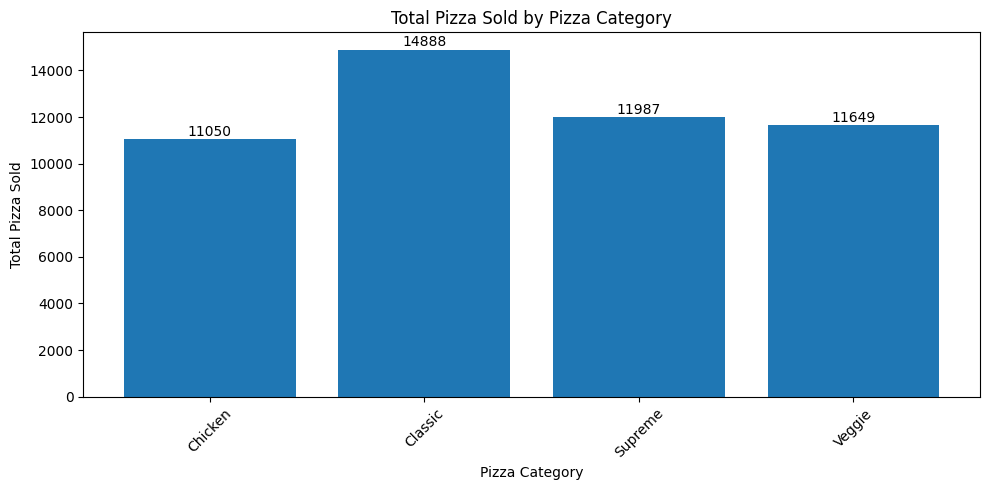

In [59]:
pizza_sold = df.groupby('pizza_category')['quantity'].sum()
plt.figure(figsize=(10,5))
plt.bar(pizza_sold.index,pizza_sold.values)
plt.title('Total Pizza Sold by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Total Pizza Sold')
plt.xticks(rotation = 45)

for i, val in enumerate(pizza_sold):
  plt.text(i,val+10, str(val), ha = 'center', va ='bottom')

plt.tight_layout()
plt.show()

In [60]:
pizza_sold

,quantity
pizza_category,
Chicken,11050
Classic,14888
Supreme,11987
Veggie,11649


### Top 5 best selling pizzas - Total Orders



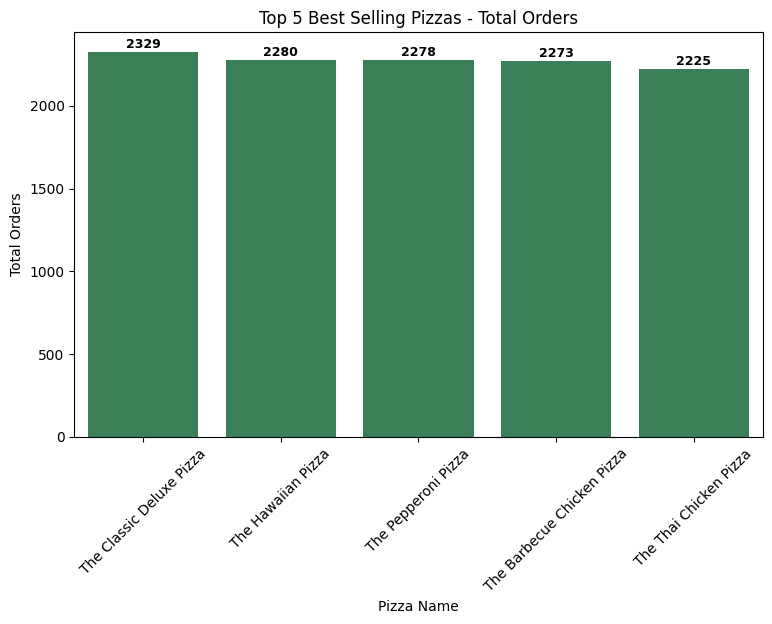

In [74]:
pizza_order =df.groupby('pizza_name')['order_id'].nunique().sort_values(ascending = False).head(5)
plt.figure(figsize=(8,5))
sns.barplot(x=pizza_order.index,y=pizza_order.values, color='seagreen')

for i, val in enumerate(pizza_order):
  plt.text(i,val+5, str(val), ha='center', va = 'bottom',fontsize = 9, fontweight = 'bold')
plt.title("Top 5 Best Selling Pizzas - Total Orders")
plt.xlabel("Pizza Name")
plt.ylabel("Total Orders")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### Top 5 best selling pizzas - Total Revenue




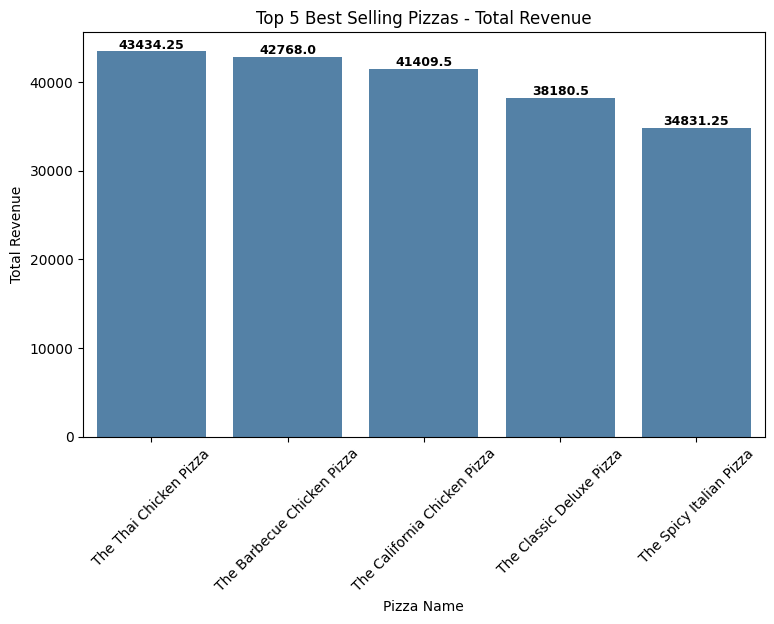

In [72]:
pizza_order =df.groupby('pizza_name')['total_price'].sum().sort_values(ascending = False).head(5)
plt.figure(figsize=(8,5))
sns.barplot(x=pizza_order.index, y=pizza_order.values, color='steelblue')

for i, val in enumerate(pizza_order):
  plt.text(i,val+5, str(val), ha='center', va = 'bottom',fontsize = 9, fontweight = 'bold')
plt.title("Top 5 Best Selling Pizzas - Total Revenue")
plt.xlabel("Pizza Name")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [61]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_name,order_hour,month_name
0,1,1,hawaiian_m,1,2015-01-01,1900-01-01 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday,11,January
1,2,2,classic_dlx_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Thursday,11,January
2,3,2,five_cheese_l,1,2015-01-01,1900-01-01 11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,Thursday,11,January
3,4,2,ital_supr_l,1,2015-01-01,1900-01-01 11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,Thursday,11,January
4,5,2,mexicana_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,Thursday,11,January


### Top 5 best selling pizzas - Total Quantity

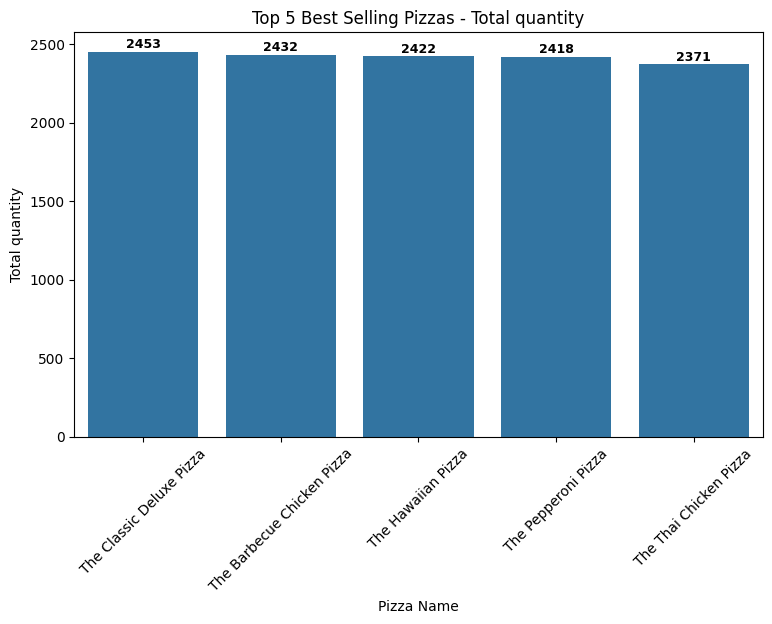

In [73]:
pizza_order =df.groupby('pizza_name')['quantity'].sum().sort_values(ascending = False).head(5)
plt.figure(figsize=(8,5))
sns.barplot(x=pizza_order.index,y=pizza_order.values)

for i, val in enumerate(pizza_order):
  plt.text(i,val+5, str(val), ha='center', va = 'bottom',fontsize = 9, fontweight = 'bold')
plt.title("Top 5 Best Selling Pizzas - Total quantity")
plt.xlabel("Pizza Name")
plt.ylabel("Total quantity")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### Bottom 5 Least-Selling Pizzas - Total Orders

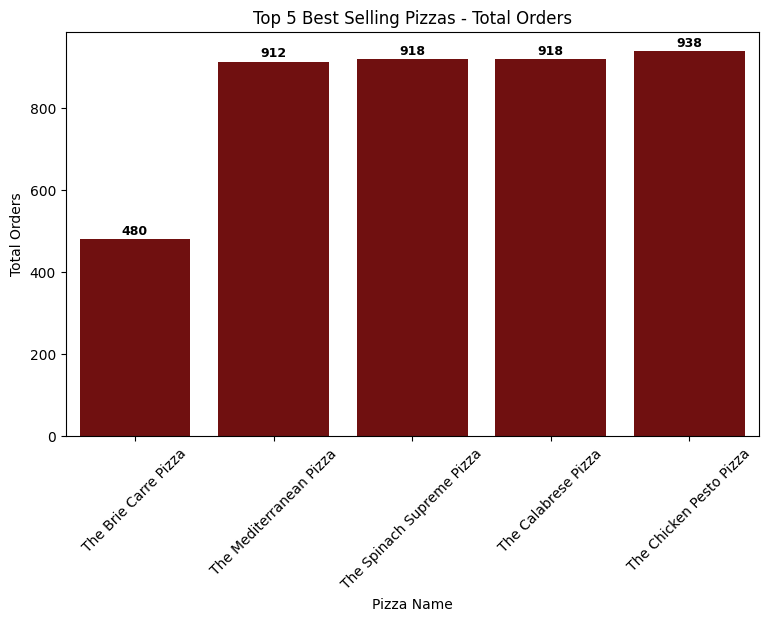

In [78]:
pizza_order =df.groupby('pizza_name')['order_id'].nunique().sort_values(ascending = True).head(5)
plt.figure(figsize=(8,5))
sns.barplot(x=pizza_order.index,y=pizza_order.values, color='maroon')

for i, val in enumerate(pizza_order):
  plt.text(i,val+5, str(val), ha='center', va = 'bottom',fontsize = 9, fontweight = 'bold')
plt.title("Top 5 Best Selling Pizzas - Total Orders")
plt.xlabel("Pizza Name")
plt.ylabel("Total Orders")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### Bottom 5 Least-Selling Pizzas - Total Revenue

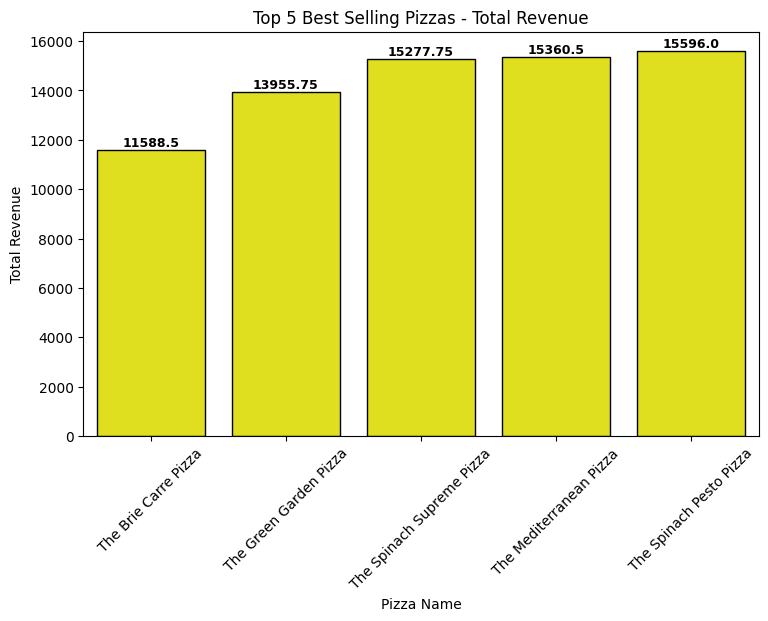

In [81]:
pizza_order =df.groupby('pizza_name')['total_price'].sum().sort_values(ascending = True).head(5)
plt.figure(figsize=(8,5))
sns.barplot(x=pizza_order.index,y=pizza_order.values, color='yellow', edgecolor = 'black')

for i, val in enumerate(pizza_order):
  plt.text(i,val+5, str(val), ha='center', va = 'bottom',fontsize = 9, fontweight = 'bold')
plt.title("Top 5 Best Selling Pizzas - Total Revenue")
plt.xlabel("Pizza Name")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### Bottom 5 Least-Selling Pizzas - Total Quantity

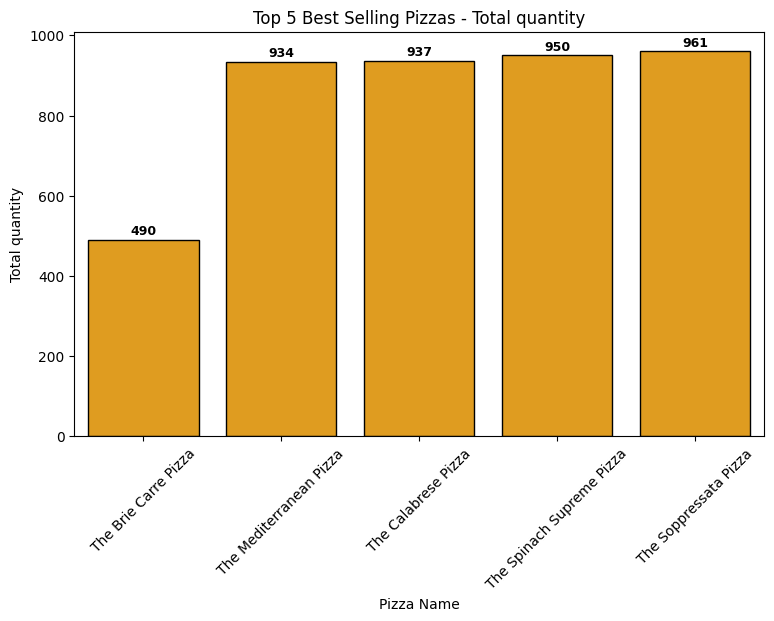

In [82]:
pizza_order =df.groupby('pizza_name')['quantity'].sum().sort_values(ascending = True).head(5)
plt.figure(figsize=(8,5))
sns.barplot(x=pizza_order.index,y=pizza_order.values, color='orange', edgecolor = 'black')

for i, val in enumerate(pizza_order):
  plt.text(i,val+5, str(val), ha='center', va = 'bottom',fontsize = 9, fontweight = 'bold')
plt.title("Top 5 Best Selling Pizzas - Total quantity")
plt.xlabel("Pizza Name")
plt.ylabel("Total quantity")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()